In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (GridSearchCV, ParameterGrid,
                                     RandomizedSearchCV)
from sklearn.metrics import fbeta_score, make_scorer
from tools import (Modelisation, datasets, SearchCV, restauration_CV, 
                   graph_2scores_CV, graph_3scores_CV, graph_param_CV, 
                   best_score_CV)

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df.shape

(1610494, 48)

**Définition des variables quantitatives, des variables catégorielles et des datasets :**

In [3]:
datasets_df = datasets(df)
X_quant = datasets_df['X_quant']
X_cat = datasets_df['X_cat']
X = datasets_df['X']
y = datasets_df['y']

Columns_quant :


['contextid',
 'campaignctrlast24h',
 'dayssincelastvisitdouble',
 'ltf_nbglobaldisplay_4w',
 'ltf_nbpartnerdisplayssincelastclick',
 'ltf_nbpartnerdisplay_90d',
 'ltf_nbpartnerclick_90d',
 'ltf_nbpartnersales_90d',
 'nbdayssincelastclick',
 'nbdisplay_1hour',
 'nbdisplayglobalapprox_1d_sum_xdevice',
 'display_size',
 'zonecostineuro']


Columns_cat :


['display_env',
 'target_env',
 'campaignscenario',
 'campaignvertical',
 'is_interstitial',
 'device_type',
 'hour',
 'weekday']


Nombre de variables pour X_quant : 13



Index(['contextid', 'campaignctrlast24h', 'dayssincelastvisitdouble',
       'ltf_nbglobaldisplay_4w', 'ltf_nbpartnerdisplayssincelastclick',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'display_size',
       'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 50



Index(['display_env_app_ios', 'display_env_other', 'display_env_web',
       'target_env_2', 'campaignscenario_5', 'campaignscenario_6',
       'campaignscenario_11', 'campaignscenario_12', 'campaignscenario_13',
       'campaignscenario_17', 'campaignvertical_20.0', 'campaignvertical_23.0',
       'campaignvertical_129.0', 'campaignvertical_200002.0',
       'is_interstitial_True', 'device_type_Desktop',
       'device_type_Desktop - Safari', 'device_type_Mobile - Other',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')


Nombre de variables pour X : 63


# Decision tree
## Variables quantitatives

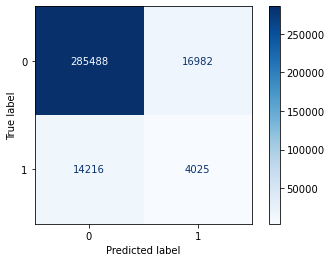

f1 : 0.2051
f3 : 0.2174
f5 : 0.2194
recall : 0.2207
negative predictive value : 0.9526
precision : 0.1916
roc_auc : 0.5823
training time : 18.039s
prediction time : 0.145s


In [4]:
m = Modelisation(X_quant, y, DecisionTreeClassifier())
m.show_conf_matrix()
m.show_metrics_score()

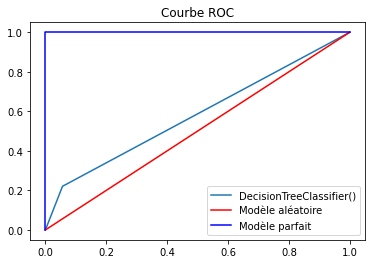

In [5]:
m.show_ROC()

In [6]:
m.show_attributes()

max_depth : 49
n_leaves : 91839
node_count : 183677


/home/headless/work/statapp/tools.py:168: RuntimeWarning: invalid value encountered in long_scalars
  Precision = TP / (TP + FP)


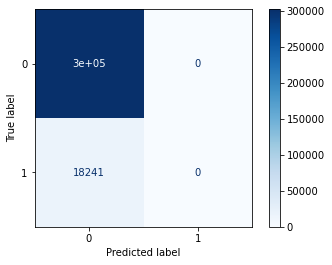

f1 : nan
f3 : nan
f5 : nan
recall : 0.0000
negative predictive value : 0.9431
precision : nan
roc_auc : 0.7392
training time : 1.894s
prediction time : 0.036s


In [7]:
m = Modelisation(X_quant, y, DecisionTreeClassifier(max_depth=2))
m.show_conf_matrix()
m.show_metrics_score()

In [8]:
m.show_attributes()

max_depth : 2
n_leaves : 4
node_count : 7


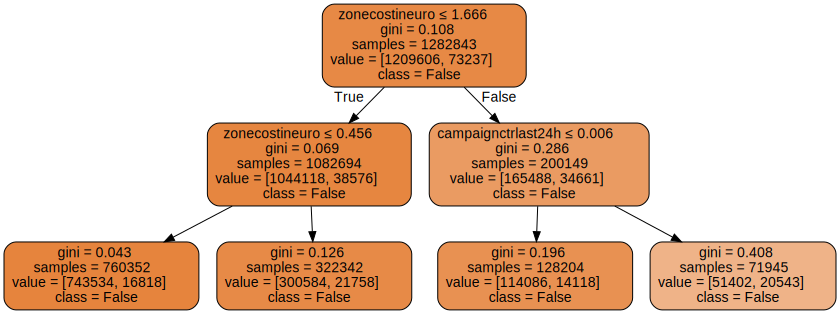

In [9]:
m.plot_tree()

## Variables catégorielles

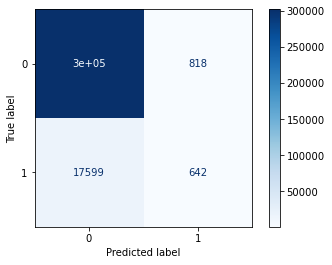

f1 : 0.0652
f3 : 0.0388
f5 : 0.0365
recall : 0.0352
negative predictive value : 0.9449
precision : 0.4397
roc_auc : 0.6537
training time : 12.353s
prediction time : 0.133s


In [10]:
m = Modelisation(X_cat, y, DecisionTreeClassifier())
m.show_conf_matrix()
m.show_metrics_score()

In [11]:
m.show_attributes()

max_depth : 47
n_leaves : 19833
node_count : 39665


## Variables quantitatives + catégorielles

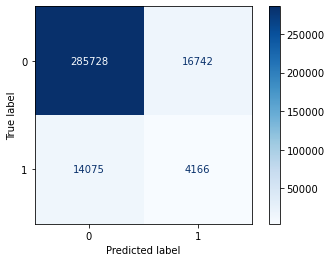

f1 : 0.2128
f3 : 0.2251
f5 : 0.2271
recall : 0.2284
negative predictive value : 0.9531
precision : 0.1993
roc_auc : 0.5866
training time : 32.442s
prediction time : 0.262s


In [12]:
m = Modelisation(X, y, DecisionTreeClassifier())
m.show_conf_matrix()
m.show_metrics_score()

In [13]:
m.show_attributes()

max_depth : 52
n_leaves : 87836
node_count : 175671


# Random Forest

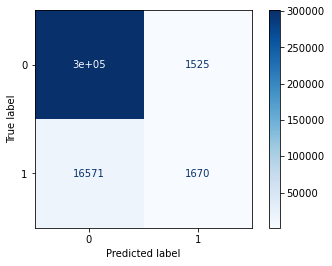

f1 : 0.1558
f3 : 0.0998
f5 : 0.0946
recall : 0.0916
negative predictive value : 0.9478
precision : 0.5227
roc_auc : 0.7353
training time : 5.402s
prediction time : 0.337s


In [14]:
m = Modelisation(X, y, RandomForestClassifier(n_estimators=10, n_jobs=-1))
m.show_conf_matrix()
m.show_metrics_score()

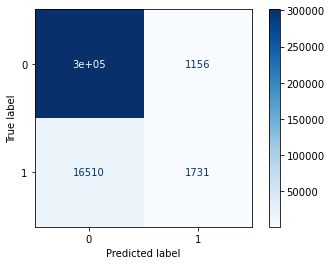

f1 : 0.1639
f3 : 0.1036
f5 : 0.0981
recall : 0.0949
negative predictive value : 0.9481
precision : 0.5996
roc_auc : 0.8104
training time : 26.791s
prediction time : 0.825s


In [15]:
m = Modelisation(X, y, RandomForestClassifier(n_estimators=100, n_jobs=-1))
m.show_conf_matrix()
m.show_metrics_score()

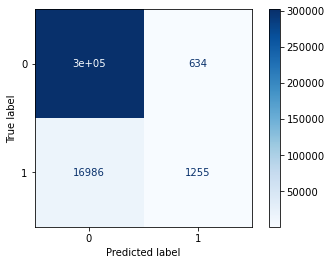

f1 : 0.1247
f3 : 0.0756
f5 : 0.0713
recall : 0.0688
negative predictive value : 0.9467
precision : 0.6644
roc_auc : 0.8326
training time : 23.684s
prediction time : 0.615s


In [16]:
m = Modelisation(X, y, RandomForestClassifier(min_samples_leaf=15, n_estimators=100, n_jobs=-1))
m.show_conf_matrix()
m.show_metrics_score()

## Tuning des hyperparamètres avec GridSearchCV

In [17]:
model = RandomForestClassifier()

cv_params = {
        'bootstrap': [False, True],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

scoring = {'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1',
           'f3': make_scorer(fbeta_score, beta=3),
           'f5': make_scorer(fbeta_score, beta=5)
          }

print(len(ParameterGrid(cv_params)))

4356


In [18]:
# SearchCV(model, cv_params, data_frac=0.05, random=True, n_iter=1000, scoring=scoring, n_jobs=28, random_state=1234)

In [19]:
dico, results = restauration_CV('Forest_CV_Randomized1000_4356_0.05')

model : RandomForestClassifier()
model_name : Forest
type : RandomizedSearchCV
len_grid : 4356
n_iter : 1000
data_frac : 0.05
temps : 06:51:15
n_jobs : 28
params : {'bootstrap': [False, True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, beta=3), 'f5': make_scorer(fbeta_score, beta=5)}


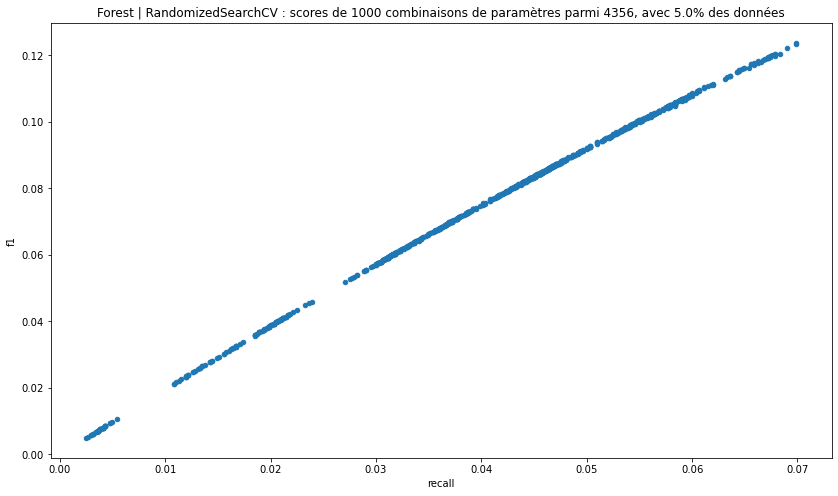

In [20]:
graph_2scores_CV(dico, results, 'recall', 'f1', s=20)

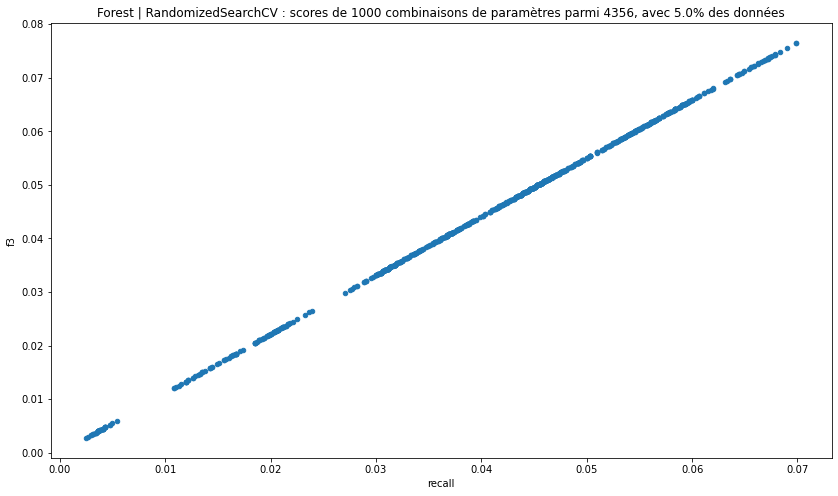

In [21]:
graph_2scores_CV(dico, results, 'recall', 'f3', s=20)

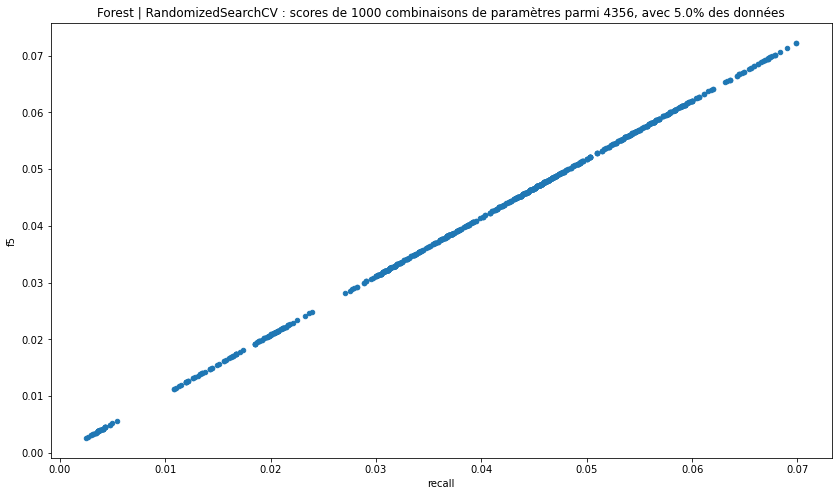

In [22]:
graph_2scores_CV(dico, results, 'recall', 'f5', s=20)

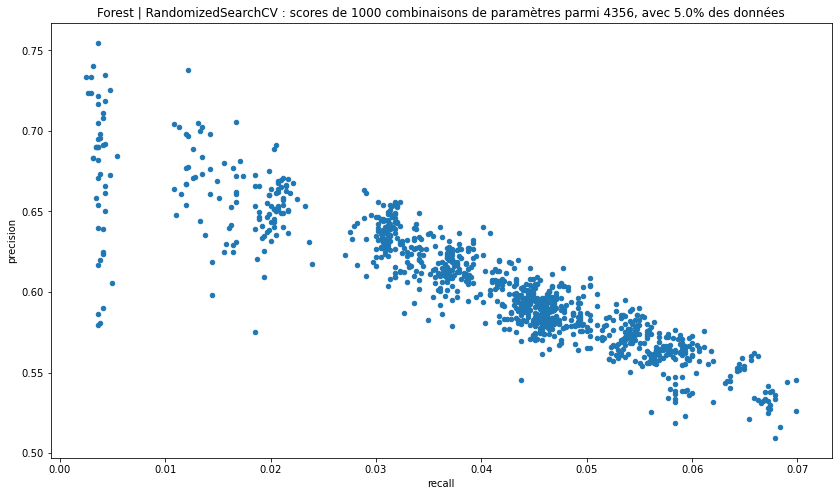

In [23]:
graph_2scores_CV(dico, results, 'recall', 'precision', s=20)

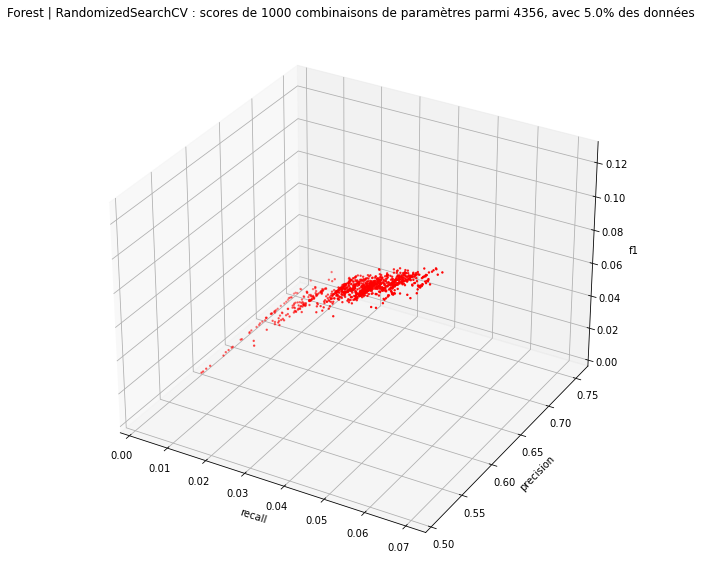

In [24]:
graph_3scores_CV(dico, results, 'recall', 'precision', 'f1', s=2)

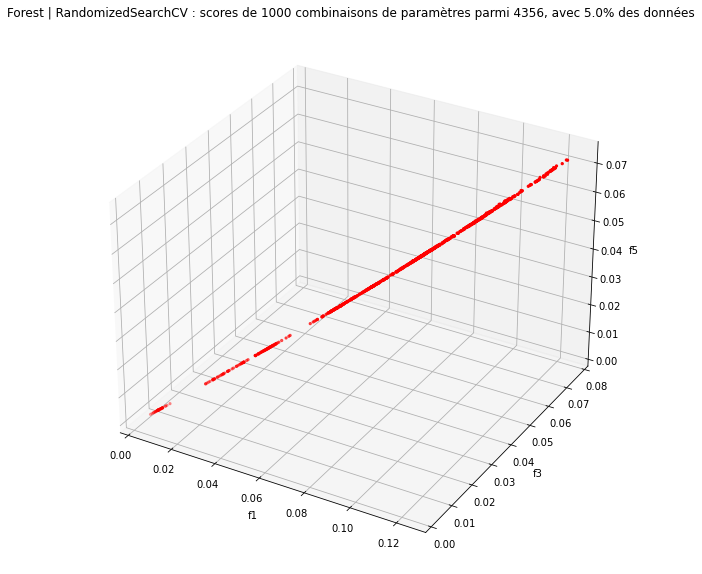

In [25]:
graph_3scores_CV(dico, results, 'f1', 'f3', 'f5', s=5)

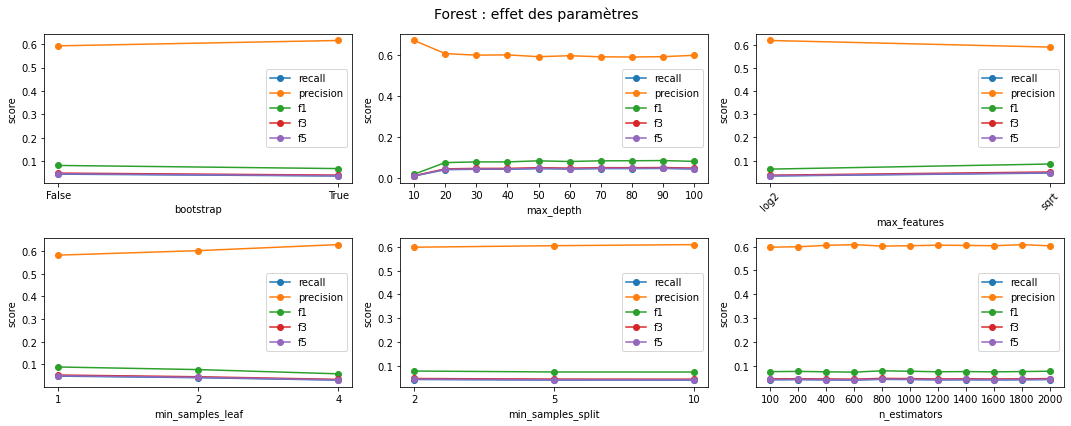

In [26]:
graph_param_CV(dico, results)

In [27]:
best_params = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
702,77.505569,0.898281,2.340056,0.029954,400,2,1,sqrt,30,False,...,959,0.123778,0.008302,1,0.076547,0.005497,1,0.072303,0.005226,1
101,19.949111,0.875254,0.658975,0.092017,100,2,1,sqrt,60,False,...,993,0.123298,0.005852,2,0.076512,0.004075,2,0.072292,0.00389,2
516,42.058799,6.027751,1.223548,0.03364,200,2,1,sqrt,60,False,...,962,0.122304,0.007375,3,0.075568,0.004993,3,0.071373,0.004756,3
994,19.700876,0.218639,0.613247,0.011177,100,2,1,sqrt,<NA>,False,...,999,0.12048,0.011919,4,0.07478,0.007974,4,0.070658,0.007585,4
880,236.229033,2.327122,7.003332,0.127823,1200,2,1,sqrt,50,False,...,977,0.1204,0.005867,5,0.074342,0.003891,5,0.070211,0.0037,5
886,117.831136,1.732347,3.584187,0.138496,600,2,1,sqrt,50,False,...,983,0.120272,0.009643,6,0.074331,0.00646,6,0.070206,0.006146,6
733,19.694853,0.122897,0.618738,0.014712,100,2,1,sqrt,70,False,...,1000,0.119663,0.010541,9,0.074285,0.00705,7,0.070191,0.006706,7
831,79.719741,0.534912,2.366392,0.016282,400,2,1,sqrt,40,False,...,972,0.120073,0.008818,7,0.0741,0.005918,8,0.069978,0.00563,8
430,316.67332,4.973586,9.936224,1.218804,1600,2,1,sqrt,60,False,...,974,0.119691,0.005106,8,0.073854,0.003529,9,0.069745,0.003368,9
556,198.807608,2.318134,5.848273,0.054374,1000,2,1,sqrt,90,False,...,990,0.119492,0.008146,10,0.073839,0.005469,10,0.069741,0.005204,10


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

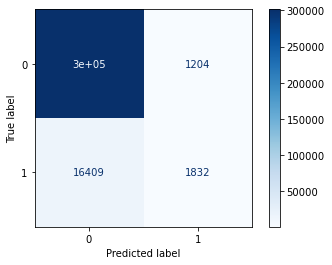

f1 : 0.1722
f3 : 0.1096
f5 : 0.1038
recall : 0.1004
negative predictive value : 0.9483
precision : 0.6034
roc_auc : 0.8257
training time : 2min, 12.804s
prediction time : 2.64s


In [28]:
m = Modelisation(X, y, RandomForestClassifier(**best_params, n_jobs=-1))
m.show_conf_matrix()
m.show_metrics_score()

In [29]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:05:12
